In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 14)

#Univariate analysis

In [3]:
df.groupby(['Gender']).count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,,,
Female,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543
Male,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457


Bi variate analysis

In [4]:
import seaborn as sns

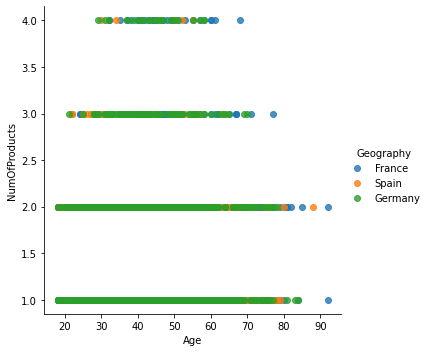

In [5]:
sns.lmplot(x = 'Age' ,y = 'NumOfProducts',hue='Geography',fit_reg= False,data = df)

Multi variate analysis

In [6]:
import matplotlib.pyplot as plt


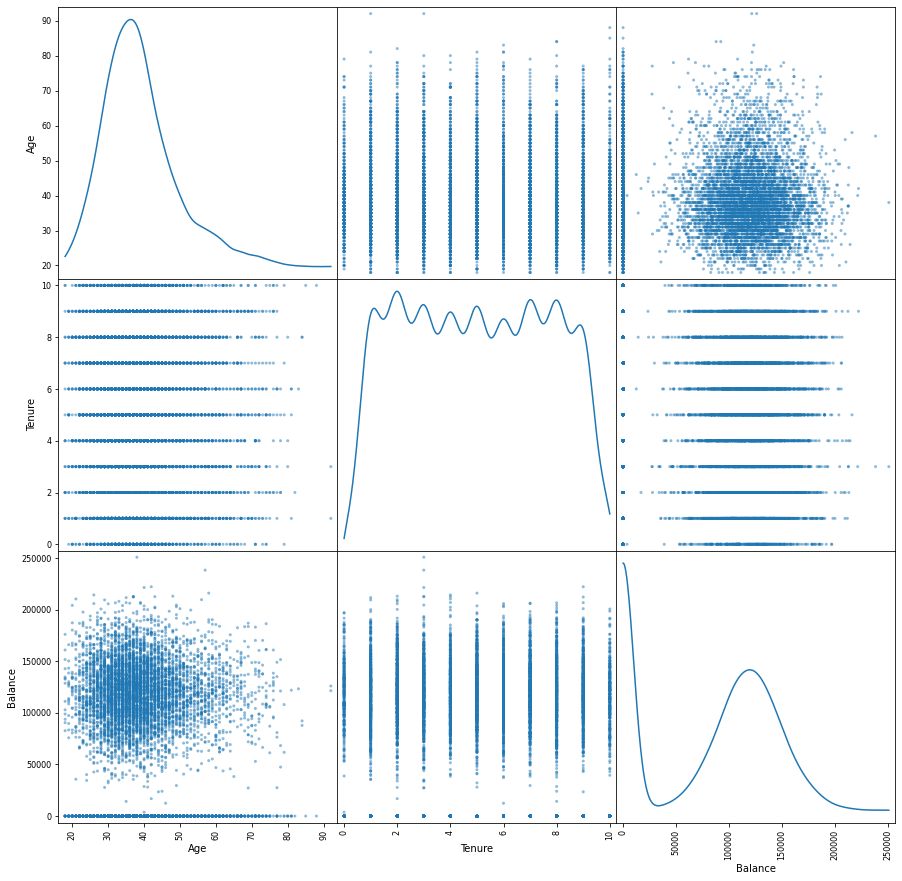

In [7]:
pd.plotting.scatter_matrix(df.loc[:, "Age":"Balance"], diagonal="kde",figsize=(15,15))
plt.show()

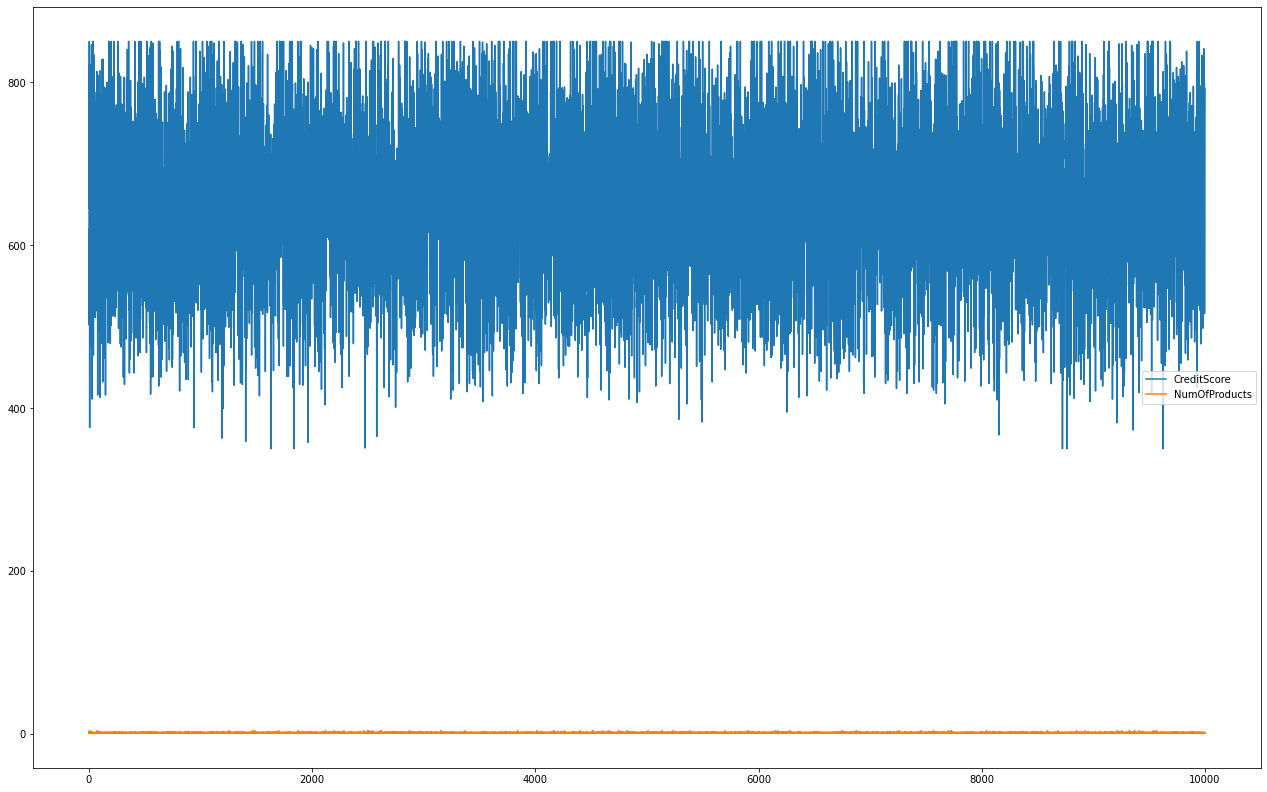

In [8]:
ax = df[["CreditScore","NumOfProducts"]].plot(figsize=(22,14))
ax.legend(loc='center right', bbox_to_anchor=(1, 0.5));

4)Descriptive statistics

In [9]:
df.Age.mean()

38.9218

In [10]:
df.Age.std()

10.487806451704609

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5)Missing data

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

6)Outlier and replace outlier

In [16]:
import numpy as np
import pandas as pd

In [12]:
bal_mean = df['Balance'].mean()
bal_std = df['Balance'].std()
low= bal_mean -(3 * bal_std)
high= bal_mean + (3 * bal_std)
bal_outliers = df[(df['Balance'] < low) | (df['Balance'] > high)]
bal_outliers.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


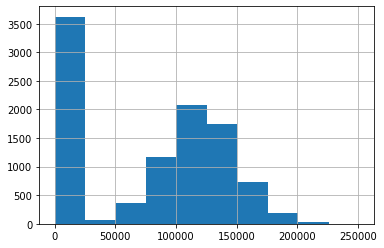

In [13]:
df['Balance'].hist()

In [14]:
import seaborn as sns

In [17]:
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Balance']=np.where(df['Balance']>upper_whisker,upper_whisker,np.where(df['Balance']<lower_whisker,lower_whisker,df['Balance']))

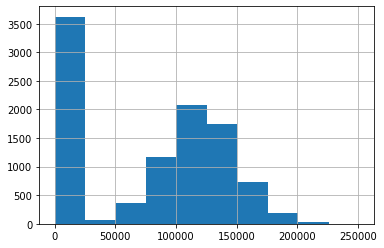

In [18]:
df['Balance'].hist()

7)Categorical columns and perform encoding

In [19]:
df['Gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object

In [20]:
Ge = pd.get_dummies(df['Gender'])
Ge

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


8)Split data into independent and dependent variable

In [ ]:
x = df.drop(['Exited'],axis=1).values
y = df['Exited']

In [ ]:
x


array([[1, 15634602, 'Hargrave', ..., 1, 1, 101348.88],
       [2, 15647311, 'Hill', ..., 0, 1, 112542.58],
       [3, 15619304, 'Onio', ..., 1, 0, 113931.57],
       ...,
       [9998, 15584532, 'Liu', ..., 0, 1, 42085.58],
       [9999, 15682355, 'Sabbatini', ..., 1, 0, 92888.52],
       [10000, 15628319, 'Walker', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

9)Scale the independent variable

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
min_max_scaler = MinMaxScaler()
df[["Age", "Balance"]] = min_max_scaler.fit_transform(df[["Age", "Balance"]])
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
0             1    15634602   Hargrave          619    France  Female   
1             2    15647311       Hill          608     Spain  Female   
2             3    15619304       Onio          502    France  Female   
3             4    15701354       Boni          699    France  Female   
4             5    15737888   Mitchell          850     Spain  Female   
...         ...         ...        ...          ...       ...     ...   
9995       9996    15606229   Obijiaku          771    France    Male   
9996       9997    15569892  Johnstone          516    France    Male   
9997       9998    15584532        Liu          709    France  Female   
9998       9999    15682355  Sabbatini          772   Germany    Male   
9999      10000    15628319     Walker          792    France  Female   

           Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.324324       2  0.000000             

10)Split data into training and testing data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = df.drop(['Exited'],axis=1).values
y = df['Exited']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
print(x.shape,x_train.shape,x_test.shape)

(10000, 13) (7000, 13) (3000, 13)


In [27]:
print(y.shape,y_train.shape,y_test.shape)

(10000,) (7000,) (3000,)
